### Time Series for BT Software Kalika Beauty

In [2]:
!pip install statsmodels

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Create a simple sales dataset
data = pd.read_excel('data/Google_Search.xlsx') 

#### Data pre-processing and Data Analysis

In [67]:
# Checking data type
def Datatype(df):
    # shape and data types of the data
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)

In [68]:
Datatype(data)

There are 36 rows and 3 columns
MM-YY                          datetime64[ns]
Average of saree Interest             float64
Average of Lehenga Interest           float64
dtype: object
['Average of saree Interest' 'Average of Lehenga Interest']
['MM-YY']


In [69]:
data

,MM-YY,Average of saree Interest,Average of Lehenga Interest
0,2020-07-01,43.00,11.25
1,2020-08-01,46.60,10.20
2,2020-09-01,45.25,12.50
3,2020-10-01,58.25,16.50
4,2020-11-01,55.80,13.00
5,2020-12-01,49.25,12.50
6,2021-01-01,52.20,15.80
7,2021-02-01,57.25,16.75
8,2021-03-01,58.00,18.25
9,2021-04-01,57.00,17.50


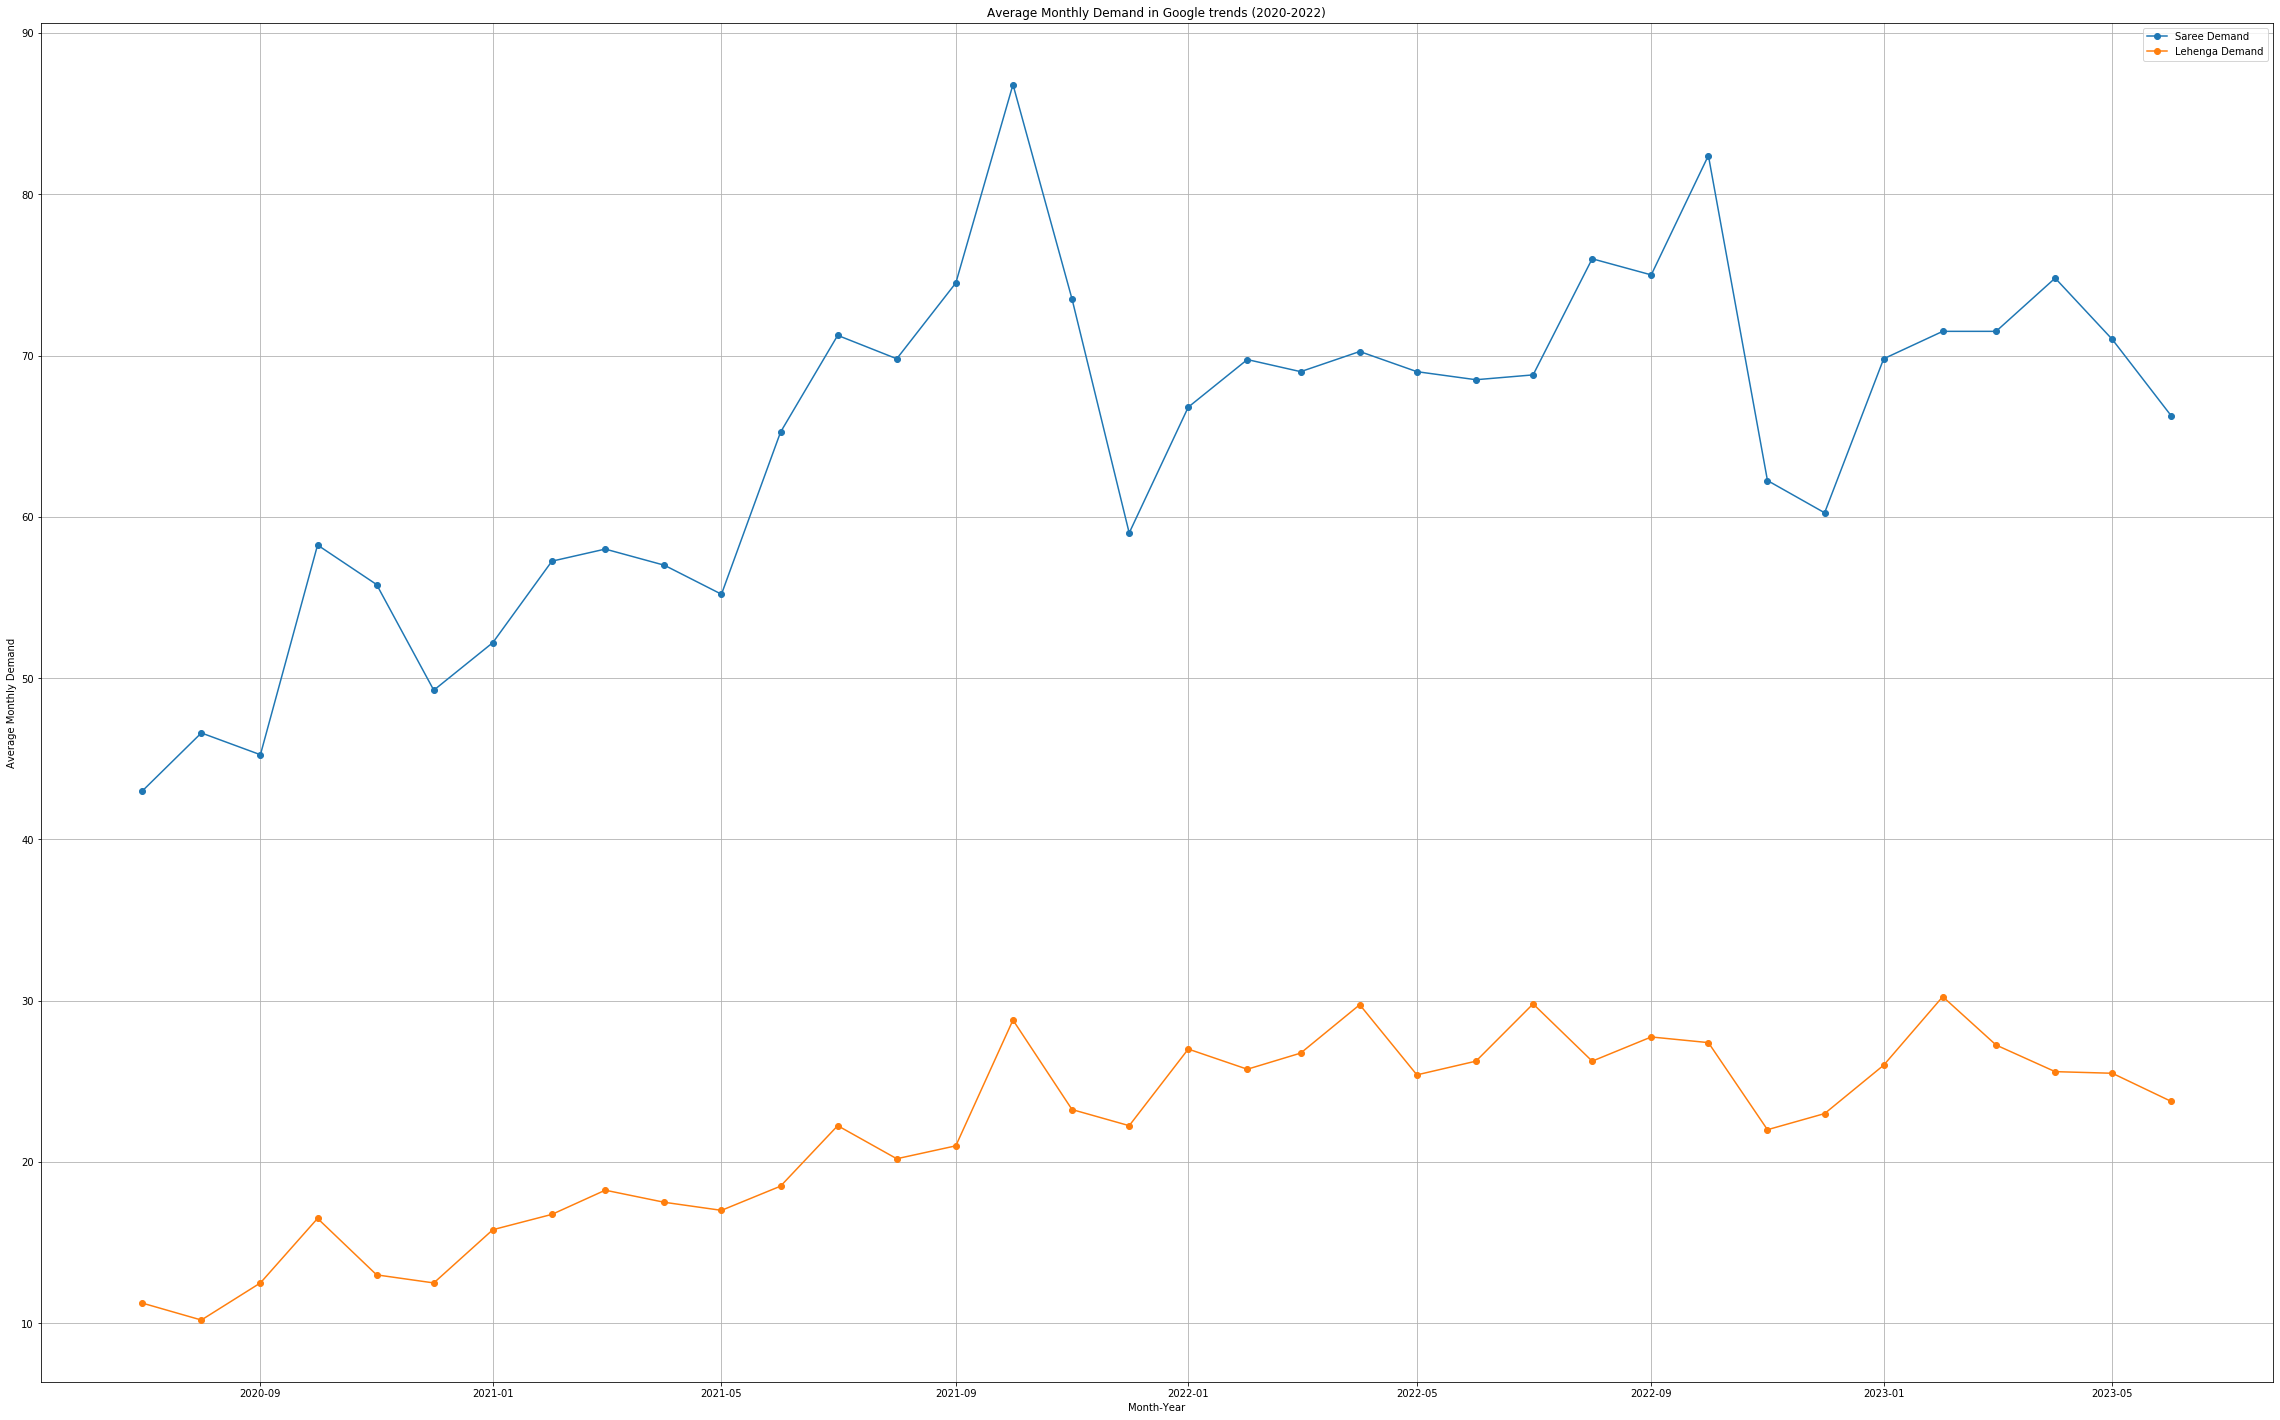

In [71]:
# Plot the sales data for each channel
plt.figure(figsize=(40, 25))
plt.plot(data['MM-YY'], data['Average of saree Interest'], label='Saree Demand', marker='o')
plt.plot(data['MM-YY'], data['Average of Lehenga Interest'], label='Lehenga Demand', marker='o')
plt.xlabel('Month-Year')
plt.ylabel('Average Monthly Demand')
plt.title('Average Monthly Demand in Google trends (2020-2022)')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
# Set the Date column as the index for time series analysis
data.set_index('MM-YY', inplace=True)

#### Modeling Using SARIMA model

In [77]:

# Fit an SARIMA model to the demand data for saree
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Seasonal order with a period of 12 (assuming annual seasonality)
model_a = SARIMAX(data['Average of saree Interest'], order=order, seasonal_order=seasonal_order)
model_a_fit = model_a.fit()

# Make projections for the next 12 months for Saree
forecast_steps = 12
demand_growth_a_12 = model_a_fit.forecast(steps=forecast_steps)

# Fit an SARIMA model to the demand data for lehenga
model_b = SARIMAX(data['Average of Lehenga Interest'], order=order, seasonal_order=seasonal_order)
model_b_fit = model_b.fit()

# Make projections for the next 12 months for Lehengas
demand_growth_b_12 = model_b_fit.forecast(steps=forecast_steps)


C:\Users\bibek\anaconda3\envs\dsc650\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\bibek\anaconda3\envs\dsc650\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\bibek\anaconda3\envs\dsc650\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\bibek\anaconda3\envs\dsc650\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\bibek\anaconda3\envs\dsc650\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning

#### Model Evaluation and Results

In [78]:
# Create a list of month-year strings for the forecast period
months_forecast = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), 
                                periods=forecast_steps, freq='MS').strftime('%b-%Y')

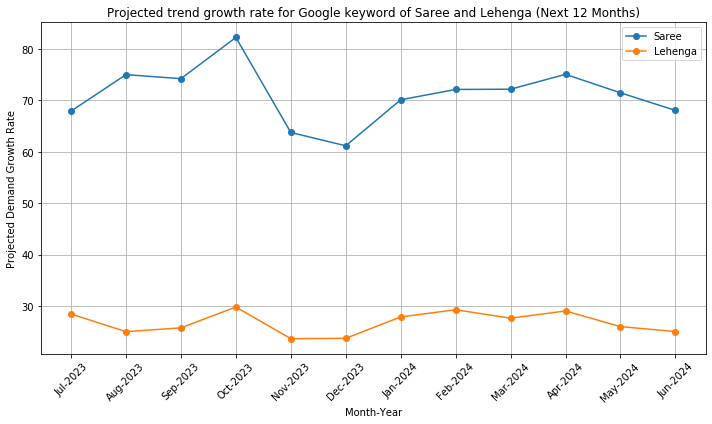

In [80]:
# Visualize the projected sales growth rates for the next 12 months
plt.figure(figsize=(10, 6))
plt.plot(months_forecast, demand_growth_a_12, marker='o', label='Saree')
plt.plot(months_forecast, demand_growth_b_12, marker='o', label='Lehenga')
plt.xlabel('Month-Year')
plt.ylabel('Projected Demand Growth Rate')
plt.title('Projected trend growth rate for Google keyword of Saree and Lehenga (Next 12 Months)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()